In [ ]:
channel_name = "Blue1Brown"

## 0. Importing Modules

In [ ]:
%%capture
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
from spacy.lang.en import English
nlp = English()

## 1. Load and Clean Data

In [ ]:
data = pd.read_csv(channel_name + ".csv")
print("Shape of data before cleaning: ",data.shape)
data. dropna(inplace=True) 
print("Shape of data after cleaning: ",data.shape)

Shape of data before cleaning:  (117, 7)
Shape of data after cleaning:  (110, 7)


In [ ]:
data.head()

,Unnamed: 0,title,views,release_date,tags,duration,age_in_days
0,0,How a Mandelbrot set arises from Newton’s work,362779,2021-10-16,"Mathematics, three blue one brown, 3 blue 1 br...",27:43,2
1,1,Newton's Fractal (which Newton knew nothing ab...,978236,2021-10-12,"Mathematics, three blue one brown, 3 blue 1 br...",26:6,6
2,2,On making math videos,601442,2021-07-16,"Mathematics, three blue one brown, 3 blue 1 br...",24:21,94
3,3,A quick trick for computing eigenvalues | Chap...,410068,2021-05-07,"Mathematics, three blue one brown, 3 blue 1 br...",13:13,164
4,4,How (and why) to raise e to the power of a mat...,1132061,2021-04-01,"Mathematics, three blue one brown, 3 blue 1 br...",27:7,200


## 2. Text Processing

### Titles

In [ ]:
# get all the titles
all_titles =np.array(data['title'])

# convert to lower
for i in range(all_titles.shape[0]):
  all_titles[i] = all_titles[i].lower()

# remove numbers
import re
for i in range(all_titles.shape[0]):
  all_titles[i] = re.sub(r'\d+','',all_titles[i])

# tokenization
token_all_titles = []
for i in all_titles:
    token_all_titles.append(word_tokenize(i))

# remove punctuations
no_punc_titles = []
for i in token_all_titles:
    no_punc_titles.append([word for word in i if  word.isalnum()])

# remove stopwords
stop_all_titles = []
for i in no_punc_titles:
    stop_all_titles.append([word for word in i if not word in stopwords.words()])

# normalization
nor_titles = []
for i in stop_all_titles:
    nor_titles.append([word.lemma_ for word in nlp(" ".join(i))])

In [ ]:
for i in range(20,23):
  print("Before NLP processing: ", all_titles[i])
  print("After NLP processing: ", nor_titles[i])
  print()

Before NLP processing:  bayes theorem, the geometry of changing beliefs
After NLP processing:  ['bayes', 'theorem', 'geometry', 'changing', 'beliefs']

Before NLP processing:  q&a with grant (bluebrown), windy walk edition
After NLP processing:  ['q', 'grant', 'bluebrown', 'windy', 'walk', 'edition']

Before NLP processing:  why do prime numbers make these spirals? | dirichlet’s theorem
After NLP processing:  ['prime', 'numbers', 'make', 'spirals', 'dirichlet', 'theorem']



### Tags

In [ ]:
# get all the titles
all_tags =np.array(data['tags'])

# convert to lower
for i in range(all_tags.shape[0]):
  all_tags[i] = all_tags[i].lower()

# remove numbers
import re
for i in range(all_tags.shape[0]):
  all_tags[i] = re.sub(r'\d+','',all_tags[i])

# tokenization
token_all_tags = []
for i in all_tags:
    token_all_tags.append(word_tokenize(i))

# remove punctuations
no_punc_tags = []
for i in token_all_tags:
    no_punc_tags.append([word for word in i if  word.isalnum()])

# remove stopwords
stop_all_tags = []
for i in no_punc_tags:
    stop_all_tags.append([word for word in i if not word in stopwords.words()])

# normalization
nor_tags = []
for i in stop_all_tags:
    nor_tags.append([word.lemma_ for word in nlp(" ".join(i))])

In [ ]:
for i in range(20,23):
  print("Before NLP processing: ", all_tags[i])
  print("After NLP processing: ", nor_tags[i])
  print()

Before NLP processing:  mathematics, three blue one brown,  blue  brown, bb, brownblue,  brown  blue, three brown one blue
After NLP processing:  ['mathematics', 'three', 'blue', 'brown', 'blue', 'brown', 'bb', 'brownblue', 'brown', 'blue', 'three', 'brown', 'blue']

Before NLP processing:  mathematics, three blue one brown,  blue  brown, bb, brownblue,  brown  blue, three brown one blue
After NLP processing:  ['mathematics', 'three', 'blue', 'brown', 'blue', 'brown', 'bb', 'brownblue', 'brown', 'blue', 'three', 'brown', 'blue']

Before NLP processing:  mathematics, three blue one brown,  blue  brown, bb, brownblue,  brown  blue, three brown one blue, number theory
After NLP processing:  ['mathematics', 'three', 'blue', 'brown', 'blue', 'brown', 'bb', 'brownblue', 'brown', 'blue', 'three', 'brown', 'blue', 'number', 'theory']



## 3. Generate Network

### Only Nodes

The number of nodes in the network:  110


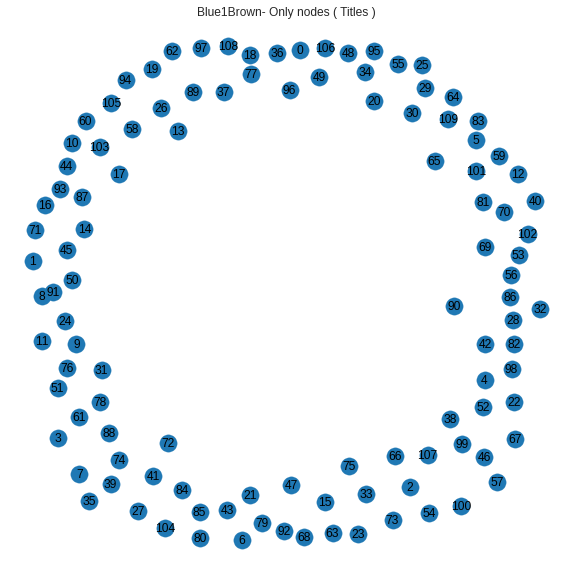

In [ ]:
BOW_dict_titles = {}
for i in range(len(nor_titles)):
  BOW_dict_titles[i] = nor_titles[i]

all_node_data_titles = {}
for i in BOW_dict_titles:
  temp_dict = {}
  temp_dict [i] = BOW_dict_titles[i]
  all_node_data_titles[i] = temp_dict

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('seaborn')

G_titles = nx.Graph()
for i in all_node_data_titles:
  G_titles.add_node(i)
nx.set_node_attributes(G_titles, BOW_dict_titles, name="BOW")

plt.figure(figsize=(10,10))
plt.title(channel_name + "- Only nodes ( Titles )")
pos = nx.spring_layout(G_titles, k=0.6, iterations=20)
nx.draw(G_titles, pos,with_labels=True)
plt.savefig(channel_name + "- Only nodes ( Titles ).jpg")
print("The number of nodes in the network: ", len(G_titles.nodes))

The number of nodes in the network:  110


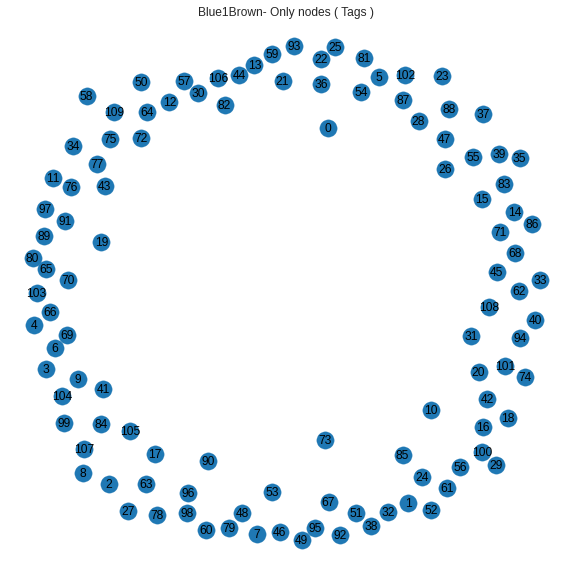

In [ ]:
BOW_dict_tags = {}
for i in range(len(nor_tags)):
  BOW_dict_tags[i] = nor_tags[i]

all_node_data_tags = {}
for i in BOW_dict_tags:
  temp_dict = {}
  temp_dict [i] = BOW_dict_tags[i]
  all_node_data_tags[i] = temp_dict

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('seaborn')

G_tags = nx.Graph()
for i in all_node_data_titles:
  G_tags.add_node(i)
nx.set_node_attributes(G_tags, BOW_dict_titles, name="BOW")

plt.figure(figsize=(10,10))
plt.title(channel_name + "- Only nodes ( Tags )")
pos = nx.spring_layout(G_tags, k=0.6, iterations=20)
nx.draw(G_tags, pos,with_labels=True)
plt.savefig(channel_name + "- Only nodes ( Tags ).jpg")
print("The number of nodes in the network: ", len(G_tags.nodes))

### Nodes With Edges

In [ ]:
def find_common(a,b):
  return  len(set(a) & set(b))

for x in BOW_dict_titles:
  for y in BOW_dict_titles:
    if(x!=y):
      t = find_common(BOW_dict_titles[x],BOW_dict_titles[y])
      if(t != 0):
        G_titles.add_edge(x,y,weight=t)

Network Density:  0.11376146788990826


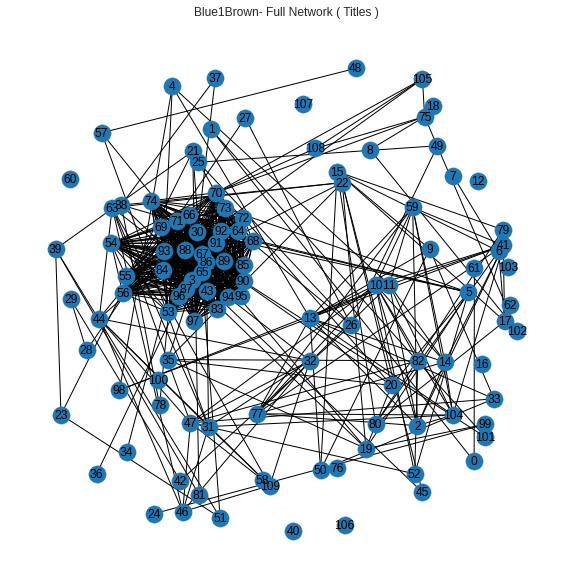

In [ ]:
plt.figure(figsize=(10,10))
plt.title(channel_name + "- Full Network ( Titles )")

pos = nx.spring_layout(G_titles, k=0.6, iterations=20)
nx.draw(G_titles, pos,with_labels=True)
print("Network Density: ", nx.density(G_titles))

plt.savefig(channel_name + "- Full Network ( Titles ).jpg")

In [ ]:
for x in BOW_dict_tags:
  for y in BOW_dict_tags:
    if(x!=y):
      t = find_common(BOW_dict_tags[x],BOW_dict_tags[y])
      if(t != 0):
        G_tags.add_edge(x,y,weight=t)

Network Density:  0.9679733110925771


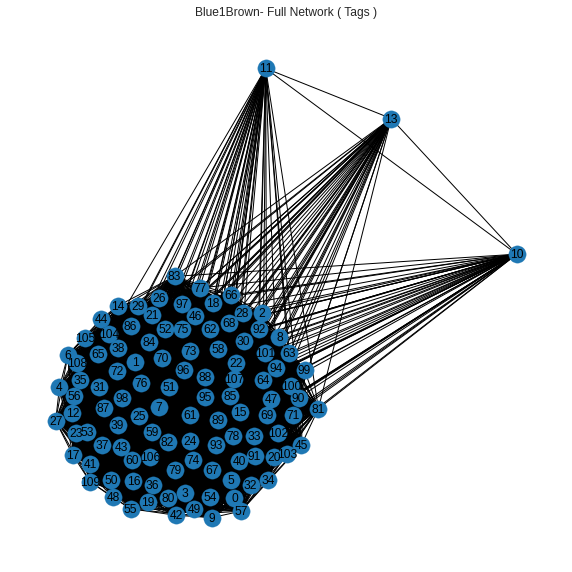

In [ ]:
plt.figure(figsize=(10,10))
plt.title(channel_name + "- Full Network ( Tags )")

pos = nx.spring_layout(G_tags, k=0.6, iterations=20)
nx.draw(G_tags, pos,with_labels=True)
print("Network Density: ", nx.density(G_tags))

plt.savefig(channel_name + "- Full Network ( Tags ).jpg")

## 4. K-Means

### Titles

In [ ]:
# Generate a dummy matrix
size = len(nor_titles)
x_titles = np.zeros((size,size))

# Generate Initial Matrix
for a in range(len(nor_titles)): 
    cnt=0
    while(cnt<size):
        x_titles[a][cnt] =  find_common(nor_titles[a],nor_titles[cnt])
        cnt+=1
print("\n Final Matrix Looks like this: ")
print(x_titles)

# Normalize Matrix
fractional_row = x_titles[0]/np.max(x_titles[0])
for a in range(1,np.shape(x_titles)[0]):
  temp = x_titles[a]/np.max(x_titles[a])
  fractional_row = np.vstack((fractional_row,temp))
x_titles = fractional_row
np.fill_diagonal(x_titles,0)
empty_diag = x_titles

print("\nNormalized Matrix")
print(x_titles)


 Final Matrix Looks like this: 
[[5. 1. 0. ... 0. 0. 0.]
 [1. 4. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 4.]]

Normalized Matrix
[[0.   0.2  0.   ... 0.   0.   0.  ]
 [0.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [ ]:
import time
begin = time.time()

from sklearn import cluster
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_clusters = 4
results = []
algorithms = {}
algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [ ]:
algorithms['kmeans'].fit(x_titles)
X1 = algorithms['kmeans'] .labels_

KM_node_classes_titles= [[] for i in range(k_clusters)]
for i in range(X1.shape[0]):
  KM_node_classes_titles[X1[i]].append(i)

print("Number of Classes: ",len(KM_node_classes_titles))
for i in range(len(KM_node_classes_titles)):
  print("Class ",i," : ",KM_node_classes_titles[i])

Number of Classes:  4
Class  0  :  [2, 10, 11, 13, 14, 41, 59, 77, 98, 104]
Class  1  :  [3, 30, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]
Class  2  :  [43, 53, 54, 56, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
Class  3  :  [0, 1, 4, 5, 6, 7, 8, 9, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 57, 58, 60, 61, 62, 63, 75, 76, 78, 79, 80, 81, 82, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109]


In [ ]:
import random

all_colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
random.shuffle(all_colors)

KM_all_colors_titles =  all_colors[:len(KM_node_classes_titles)]
print(len(KM_all_colors_titles))
print("Choosen Colors : ",KM_all_colors_titles)

4
Choosen Colors :  ['green', 'cyan', 'brown', 'magenta']


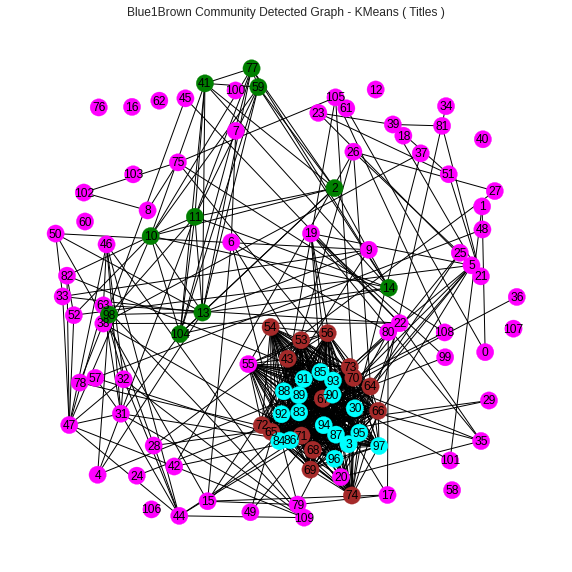

In [ ]:
KM_color_map_titles = []
KM_class_names_titles = [i for i in range(len(KM_node_classes_titles))]

for node in G_titles:
  for i in KM_class_names_titles:
    if (node in KM_node_classes_titles[i]):
      KM_color_map_titles.append(KM_all_colors_titles[i])

plt.figure(figsize=(10,10))
plt.title(channel_name+ " Community Detected Graph - KMeans ( Titles )")

pos = nx.spring_layout(G_titles, k=0.6, iterations=20)
nx.draw(G_titles, pos,with_labels=True,node_color=KM_color_map_titles)

plt.savefig(channel_name+ " Community Detected Graph - KMeans ( Titles ).jpg")
plt.show()

end = time.time()
KM_time_taken_titles = (end - begin)

### Tags


 Final Matrix Looks like this: 
[[ 6.  6.  6. ...  6.  6.  6.]
 [ 6.  6.  6. ...  6.  6.  6.]
 [ 6.  6.  6. ...  6.  6.  6.]
 ...
 [ 6.  6.  6. ... 14.  6.  6.]
 [ 6.  6.  6. ...  6. 14. 11.]
 [ 6.  6.  6. ...  6. 11. 16.]]

Normalized Matrix
[[0.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [0.42857143 0.42857143 0.42857143 ... 0.         0.42857143 0.42857143]
 [0.42857143 0.42857143 0.42857143 ... 0.42857143 0.         0.78571429]
 [0.375      0.375      0.375      ... 0.375      0.6875     0.        ]]
Number of Classes:  4
Class  0  :  [35, 36, 42, 48, 53, 54, 55, 56, 57, 58, 59, 61, 63, 70, 74, 75, 78, 79, 83, 84, 85, 86, 88, 89, 90, 91, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Class  1  :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 19, 20, 21, 25, 28, 30, 38, 39, 40, 41, 43, 50, 51

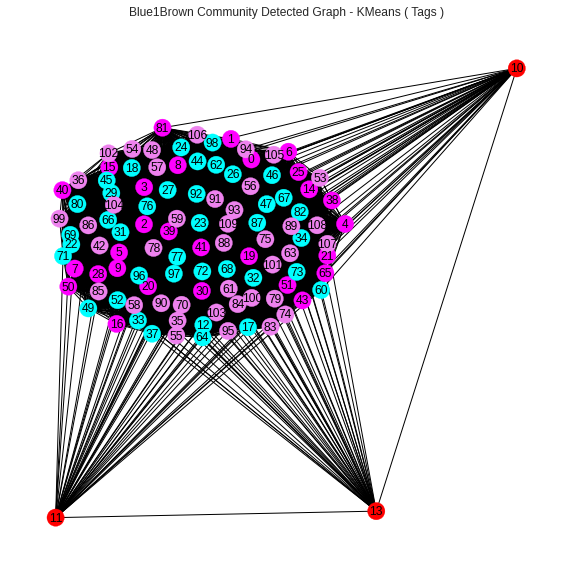

In [ ]:
# Generate a dummy matrix
size = len(nor_tags)
x_tags = np.zeros((size,size))

# Generate Initial Matrix
for a in range(len(nor_tags)): 
    cnt=0
    while(cnt<size):
        x_tags[a][cnt] =  find_common(nor_tags[a],nor_tags[cnt])
        cnt+=1
print("\n Final Matrix Looks like this: ")
print(x_tags)

# Normalize Matrix
fractional_row = x_tags[0]/np.max(x_tags[0])
for a in range(1,np.shape(x_tags)[0]):
  temp = x_tags[a]/np.max(x_tags[a])
  fractional_row = np.vstack((fractional_row,temp))
x_tags = fractional_row
np.fill_diagonal(x_tags,0)
empty_diag = x_tags

print("\nNormalized Matrix")
print(x_tags)

import time
begin = time.time()

from sklearn import cluster
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

k_clusters = 4
results = []
algorithms = {}
algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

algorithms['kmeans'].fit(x_tags)
X1 = algorithms['kmeans'] .labels_

KM_node_classes_tags= [[] for i in range(k_clusters)]
for i in range(X1.shape[0]):
  KM_node_classes_tags[X1[i]].append(i)

print("Number of Classes: ",len(KM_node_classes_tags))
for i in range(len(KM_node_classes_tags)):
  print("Class ",i," : ",KM_node_classes_tags[i])

import random

all_colors = ["green","yellow","cyan","red","orange","brown","blue","magenta","purple","olive","gray","violet","lime"]
random.shuffle(all_colors)

KM_all_colors_tags =  all_colors[:len(KM_node_classes_tags)]
print("Choosen Colors : ",KM_all_colors_tags)

KM_color_map_tags = []
KM_class_names_tags = [i for i in range(len(KM_node_classes_tags))]

for node in G_tags:
  for i in KM_class_names_tags:
    if (node in KM_node_classes_tags[i]):
      KM_color_map_tags.append(KM_all_colors_tags[i])

plt.figure(figsize=(10,10))
plt.title(channel_name+ " Community Detected Graph - KMeans ( Tags )")

pos = nx.spring_layout(G_tags, k=0.6, iterations=20)
nx.draw(G_tags, pos,with_labels=True,node_color=KM_color_map_tags)

plt.savefig(channel_name+ " Community Detected Graph - KMeans ( Tags ).jpg")
plt.show()

end = time.time()
KM_time_taken_tags = (end - begin)

## 5. Generate Excel Sheet

In [ ]:
all_views = np.array(data['views'])

KM_all_nodes_titles=[]
KM_all_community_titles=[]
KM_all_bow_titles = []
KM_node_views_titles = []

class_name = [i for i in range(k_clusters)]

for i in G_titles.nodes:
  # Append Node Number
  KM_all_nodes_titles.append(i)
  # Append Bag of words of the node
  KM_all_bow_titles.append(nor_titles[i])
  # Append the No. of Views
  KM_node_views_titles.append(all_views[i])
  # Append the community of the node
  for j in class_name:
    if (i in KM_node_classes_titles[j]):
      KM_all_community_titles.append(j)


excel_data = {}
excel_data['Node'] = KM_all_nodes_titles
excel_data['Views'] = KM_node_views_titles
excel_data['Com'] = KM_all_community_titles
excel_data['BOW'] = KM_all_bow_titles

df = pd.DataFrame(excel_data)
df.to_excel(channel_name+"_ExcelSheet - KMeans ( Titles ).xlsx")

In [ ]:
all_views = np.array(data['views'])

KM_all_nodes_tags=[]
KM_all_community_tags=[]
KM_all_bow_tags = []
KM_node_views_tags = []

class_name = [i for i in range(k_clusters)]

for i in G_tags.nodes:
  # Append Node Number
  KM_all_nodes_tags.append(i)
  # Append Bag of words of the node
  KM_all_bow_tags.append(nor_tags[i])
  # Append the No. of Views
  KM_node_views_tags.append(all_views[i])
  # Append the community of the node
  for j in class_name:
    if (i in KM_node_classes_tags[j]):
      KM_all_community_tags.append(j)


excel_data = {}
excel_data['Node'] = KM_all_nodes_tags
excel_data['Views'] = KM_node_views_tags
excel_data['Com'] = KM_all_community_tags
excel_data['BOW'] = KM_all_bow_tags

df = pd.DataFrame(excel_data)
df.to_excel(channel_name+"_ExcelSheet - KMeans ( Tags ).xlsx")

In [ ]:
KM_titles_excel = pd.read_excel('Jelly_ExcelSheet - KMeans ( Titles ).xlsx')
KM_titles_excel

,Unnamed: 0,Node,Views,Com,BOW
0,0,0,153047,0,"['get', 'hit', 'flying', 'cars', 'gta', 'chall..."
1,1,1,199029,1,"['playing', 'hide', 'seek', 'slogo', 'kitchen'..."
2,2,2,293052,0,"['drawing', 'poppy', 'playtime', 'gartic', 'ph..."
3,3,3,383450,1,"['secret', 'dropper', 'minecraft']"
4,4,4,310577,0,"['bikers', 'water', 'cannon', 'gta', 'challenge']"
...,...,...,...,...,...
170,170,170,673933,0,"['got', 'pushed', 'shredder', 'pico', 'park']"
171,171,171,355900,1,"['crafted', 'tornado', 'trolled', 'friend', 'm..."
172,172,172,1103548,0,"['pro', 'noob', 'golf', 'challenge', 'golf']"
173,173,173,596814,1,"['jelly', 'slogo', 'army', 'battle', 'minecraft']"


In [ ]:
KM_tags_excel = pd.read_excel('Jelly_ExcelSheet - KMeans ( Tags ).xlsx')
KM_tags_excel

,Unnamed: 0,Node,Views,Com,BOW
0,0,0,153047,1,"['child', 'friendly', 'kid', 'friendly', 'get'..."
1,1,1,199029,0,"['child', 'friendly', 'kid', 'friendly', 'mine..."
2,2,2,293052,0,"['child', 'friendly', 'kid', 'friendly', 'gart..."
3,3,3,383450,3,"['child', 'friendly', 'family', 'friendly', 'k..."
4,4,4,310577,1,"['child', 'friendly', 'kid', 'friendly', 'jell..."
...,...,...,...,...,...
170,170,170,673933,0,"['child', 'friendly', 'family', 'friendly', 'k..."
171,171,171,355900,1,"['child', 'friendly', 'family', 'friendly', 'k..."
172,172,172,1103548,0,"['child', 'friendly', 'family', 'friendly', 'k..."
173,173,173,596814,1,"['child', 'friendly', 'family', 'friendly', 'k..."


## 6. Analysis of KMeans

In [ ]:
print("Time taken by KMeans for Titles: ",KM_time_taken_titles)
print("Time taken by KMeans for Tags: ",KM_time_taken_tags)

Time taken by KMeans for Titles:  2.8134846687316895
Time taken by KMeans for Tags:  2.8719263076782227


## 7. Final Results

(-0.5, 719.5, 719.5, -0.5)

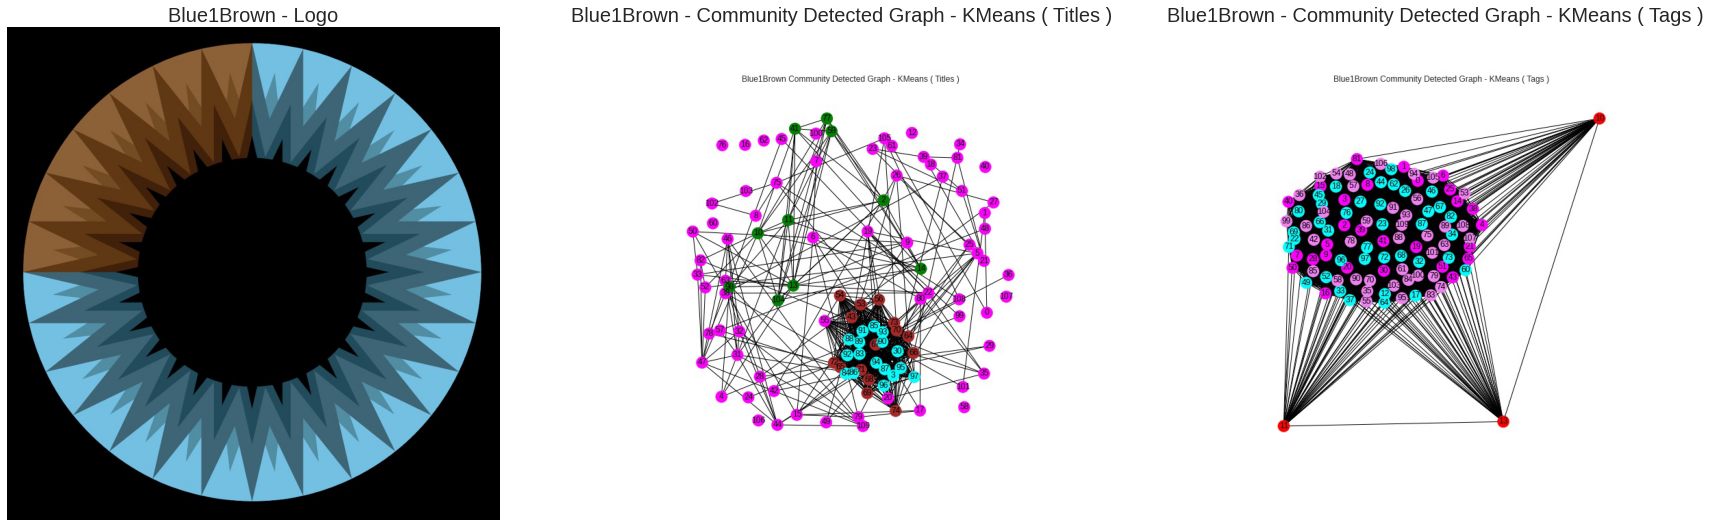

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,30))

plt.subplot(1,3,1)
img =mpimg.imread(channel_name+'.jpg')
imgplot = plt.imshow(img)
plt.title(channel_name + " - Logo",fontsize=20)
plt.axis('off')

plt.subplot(1,3,2)
img =mpimg.imread(channel_name+ " Community Detected Graph - KMeans ( Titles ).jpg")
imgplot = plt.imshow(img)
plt.title(channel_name + " - Community Detected Graph - KMeans ( Titles ) ",fontsize=20)
plt.axis('off')

plt.subplot(1,3,3)
img =mpimg.imread(channel_name+ " Community Detected Graph - KMeans ( Tags ).jpg")
imgplot = plt.imshow(img)
plt.title(channel_name + " - Community Detected Graph - KMeans ( Tags )",fontsize=20)
plt.axis('off')